In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('C:\\Users\\myakubpasha\\Downloads\\UNZIP_FOR_NOTEBOOKS_FINAL/DATA/Ames_Housing_Data.csv')

In [3]:
df.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2930 non-null   int64  
 1   MS SubClass      2930 non-null   int64  
 2   MS Zoning        2930 non-null   object 
 3   Lot Frontage     2440 non-null   float64
 4   Lot Area         2930 non-null   int64  
 5   Street           2930 non-null   object 
 6   Alley            198 non-null    object 
 7   Lot Shape        2930 non-null   object 
 8   Land Contour     2930 non-null   object 
 9   Utilities        2930 non-null   object 
 10  Lot Config       2930 non-null   object 
 11  Land Slope       2930 non-null   object 
 12  Neighborhood     2930 non-null   object 
 13  Condition 1      2930 non-null   object 
 14  Condition 2      2930 non-null   object 
 15  Bldg Type        2930 non-null   object 
 16  House Style      2930 non-null   object 
 17  Overall Qual  

In [5]:
null_values = df.isnull().sum()

In [6]:
def percent_missing(df):
    
    percent_nan = 100*df.isnull().sum()/len(df)
    percent_nan = percent_nan[percent_nan>0].sort_values()
    
    return percent_nan

In [7]:
percent_missing(df)

Electrical         0.034130
Garage Area        0.034130
Total Bsmt SF      0.034130
Bsmt Unf SF        0.034130
BsmtFin SF 1       0.034130
BsmtFin SF 2       0.034130
Garage Cars        0.034130
Bsmt Full Bath     0.068259
Bsmt Half Bath     0.068259
Mas Vnr Area       0.784983
Mas Vnr Type       0.784983
BsmtFin Type 1     2.730375
Bsmt Qual          2.730375
Bsmt Cond          2.730375
BsmtFin Type 2     2.764505
Bsmt Exposure      2.832765
Garage Type        5.358362
Garage Finish      5.426621
Garage Qual        5.426621
Garage Cond        5.426621
Garage Yr Blt      5.426621
Lot Frontage      16.723549
Fireplace Qu      48.532423
Fence             80.477816
Alley             93.242321
Misc Feature      96.382253
Pool QC           99.556314
dtype: float64

In [8]:
df = df.drop('PID', axis = 1)

In [9]:
df.shape

(2930, 80)

In [10]:
df.corr(numeric_only=True)['SalePrice'].sort_values()

Enclosed Porch    -0.128787
Kitchen AbvGr     -0.119814
Overall Cond      -0.101697
MS SubClass       -0.085092
Low Qual Fin SF   -0.037660
Bsmt Half Bath    -0.035835
Yr Sold           -0.030569
Misc Val          -0.015691
BsmtFin SF 2       0.005891
3Ssn Porch         0.032225
Mo Sold            0.035259
Pool Area          0.068403
Screen Porch       0.112151
Bedroom AbvGr      0.143913
Bsmt Unf SF        0.182855
Lot Area           0.266549
2nd Flr SF         0.269373
Bsmt Full Bath     0.276050
Half Bath          0.285056
Open Porch SF      0.312951
Wood Deck SF       0.327143
Lot Frontage       0.357318
BsmtFin SF 1       0.432914
Fireplaces         0.474558
TotRms AbvGrd      0.495474
Mas Vnr Area       0.508285
Garage Yr Blt      0.526965
Year Remod/Add     0.532974
Full Bath          0.545604
Year Built         0.558426
1st Flr SF         0.621676
Total Bsmt SF      0.632280
Garage Area        0.640401
Garage Cars        0.647877
Gr Liv Area        0.706780
Overall Qual       0

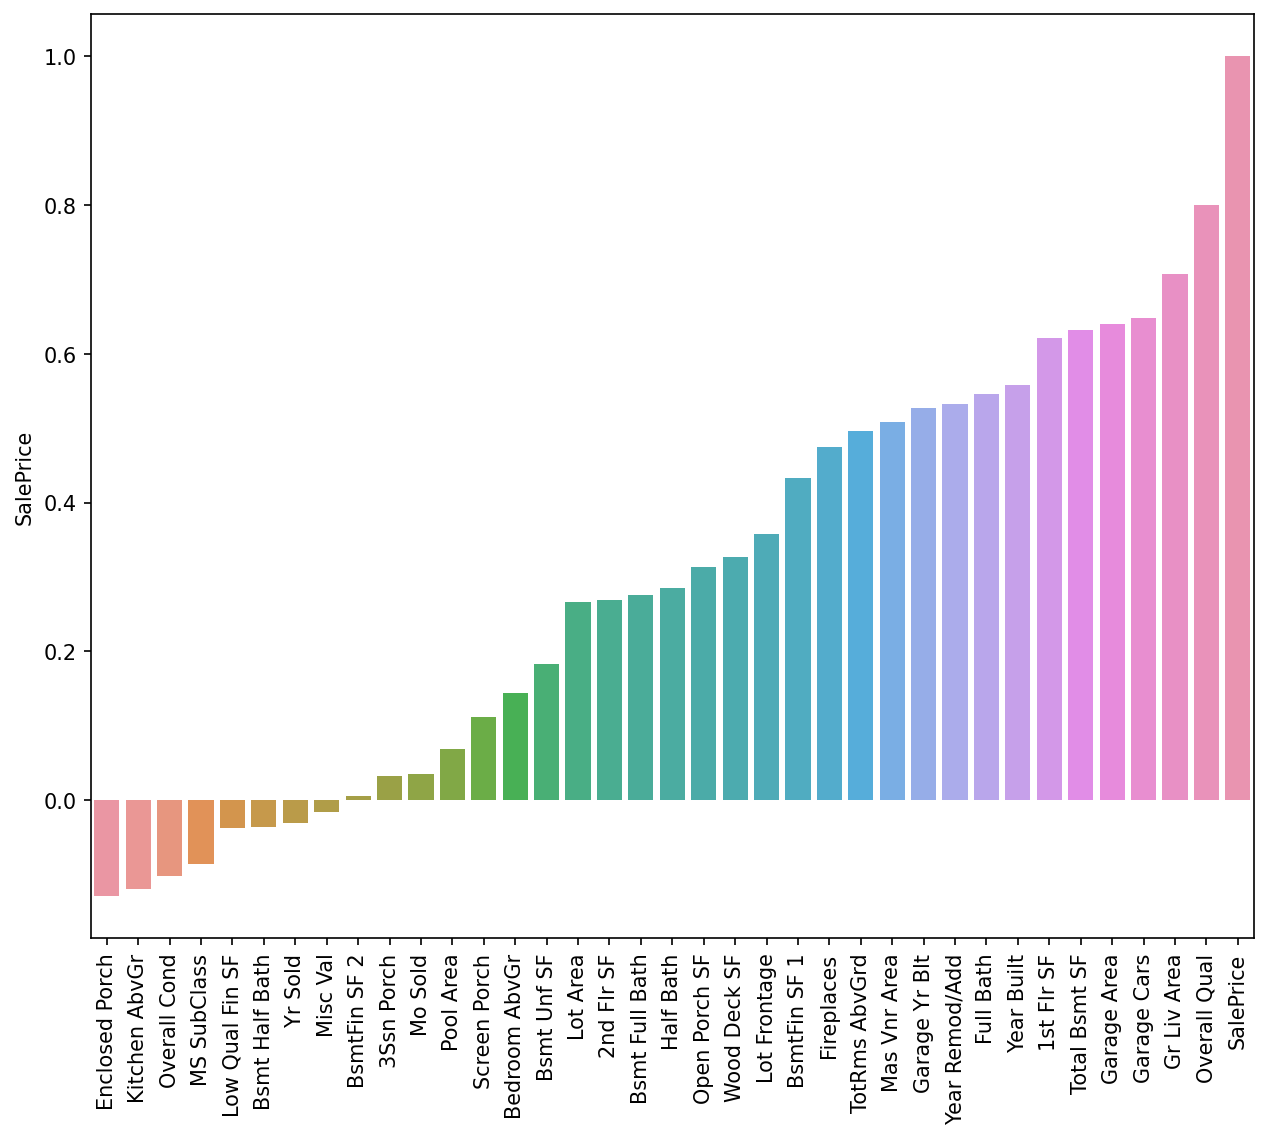

In [11]:
plt.figure(figsize = (10,8), dpi = 150)
sns.barplot(x =df.corr(numeric_only=True)['SalePrice'].sort_values().index,y=df.corr(numeric_only=True)['SalePrice'].sort_values())
plt.xticks(rotation =90);

In [12]:
missing_info = percent_missing(df)

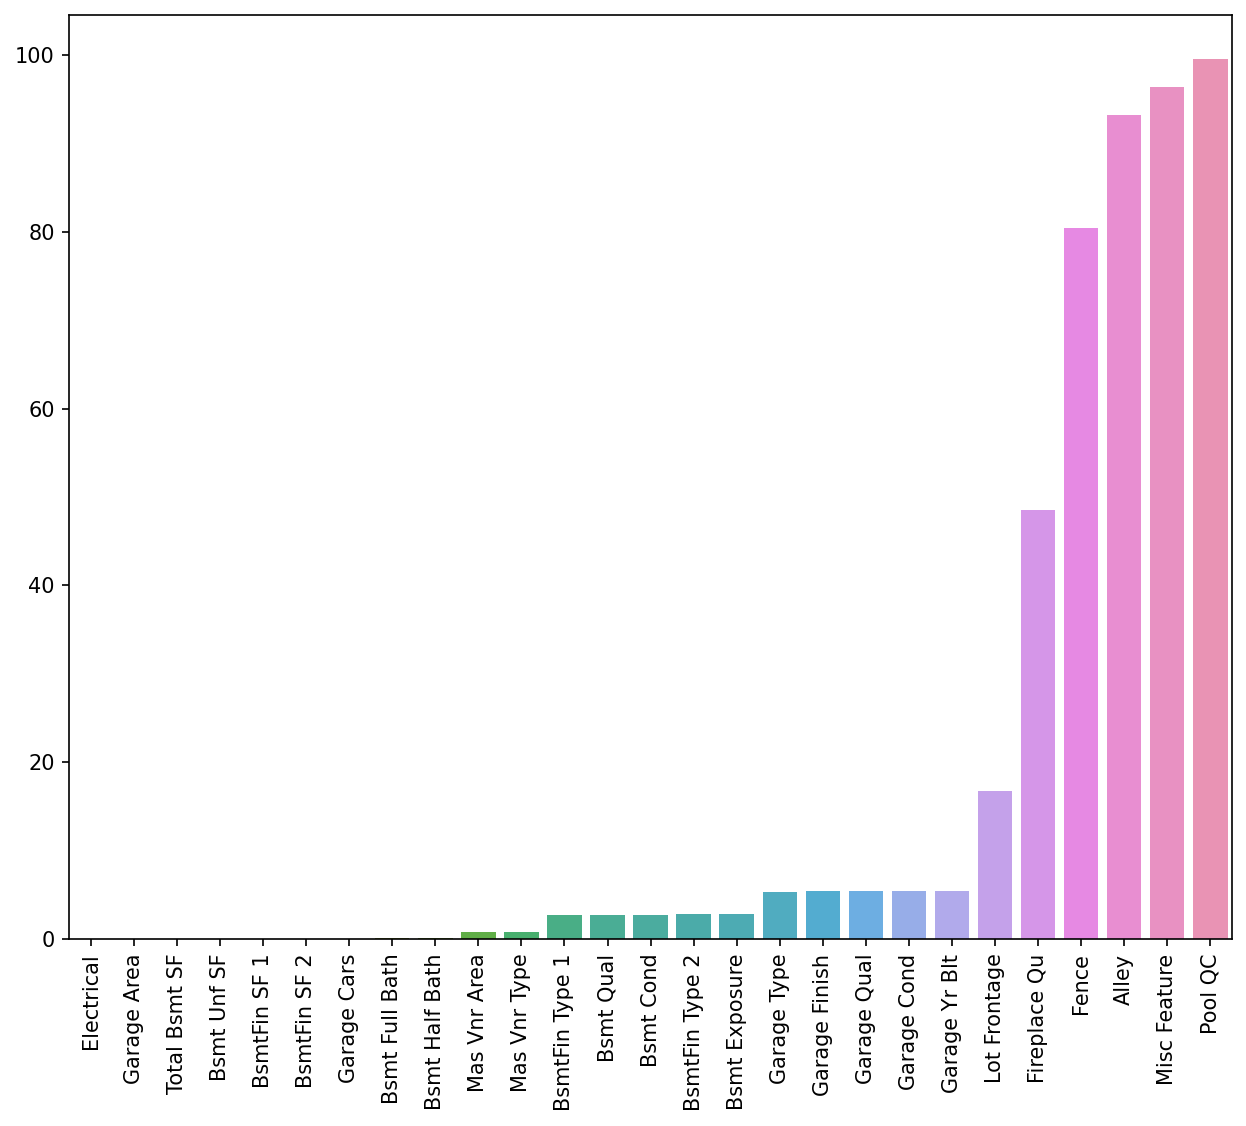

In [13]:
plt.figure(figsize = (10,8), dpi = 150)
sns.barplot(x =missing_info.index,y=missing_info)
plt.xticks(rotation =90);

In [14]:
with open('C:/Users/myakubpasha/Downloads/UNZIP_FOR_NOTEBOOKS_FINAL/DATA/Ames_Housing_Feature_Description.txt') as f:
    print(f.read())

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [15]:
df.sample(5)

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1014,120,RL,60.0,8118,Pave,NaN,Reg,HLS,AllPub,Inside,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,334000
1717,120,RL,34.0,3903,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,200000
2522,20,RL,68.0,50271,Pave,NaN,IR1,Low,AllPub,Inside,...,0,NaN,NaN,NaN,0,11,2006,WD,Normal,385000
1079,120,RM,59.0,8198,Pave,NaN,Reg,Lvl,AllPub,FR3,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,207000
2104,20,RL,68.0,8814,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,1,2007,New,Partial,203000


In [16]:
percent_missing(df)

Electrical         0.034130
Garage Area        0.034130
Total Bsmt SF      0.034130
Bsmt Unf SF        0.034130
BsmtFin SF 1       0.034130
BsmtFin SF 2       0.034130
Garage Cars        0.034130
Bsmt Full Bath     0.068259
Bsmt Half Bath     0.068259
Mas Vnr Area       0.784983
Mas Vnr Type       0.784983
BsmtFin Type 1     2.730375
Bsmt Qual          2.730375
Bsmt Cond          2.730375
BsmtFin Type 2     2.764505
Bsmt Exposure      2.832765
Garage Type        5.358362
Garage Finish      5.426621
Garage Qual        5.426621
Garage Cond        5.426621
Garage Yr Blt      5.426621
Lot Frontage      16.723549
Fireplace Qu      48.532423
Fence             80.477816
Alley             93.242321
Misc Feature      96.382253
Pool QC           99.556314
dtype: float64

In [17]:
df = df.dropna(subset=['Electrical','Garage Area'])

In [18]:
percent_missing(df)

Bsmt Unf SF        0.034153
Total Bsmt SF      0.034153
BsmtFin SF 2       0.034153
BsmtFin SF 1       0.034153
Bsmt Full Bath     0.068306
Bsmt Half Bath     0.068306
Mas Vnr Type       0.785519
Mas Vnr Area       0.785519
Bsmt Qual          2.732240
Bsmt Cond          2.732240
BsmtFin Type 1     2.732240
BsmtFin Type 2     2.766393
Bsmt Exposure      2.834699
Garage Type        5.362022
Garage Qual        5.396175
Garage Cond        5.396175
Garage Finish      5.396175
Garage Yr Blt      5.396175
Lot Frontage      16.734973
Fireplace Qu      48.497268
Fence             80.498634
Alley             93.237705
Misc Feature      96.379781
Pool QC           99.556011
dtype: float64

In [19]:
my_list = list(df.select_dtypes(include = 'object').columns)

In [20]:
import re

In [21]:
match = percent_missing(df)

In [22]:
bsmt_df = match[match.index.str.contains('Bsmt')].index

In [23]:
bsmt_df

Index(['Bsmt Unf SF', 'Total Bsmt SF', 'BsmtFin SF 2', 'BsmtFin SF 1',
       'Bsmt Full Bath', 'Bsmt Half Bath', 'Bsmt Qual', 'Bsmt Cond',
       'BsmtFin Type 1', 'BsmtFin Type 2', 'Bsmt Exposure'],
      dtype='object')

In [24]:
df[bsmt_df].select_dtypes(include='object').columns

Index(['Bsmt Qual', 'Bsmt Cond', 'BsmtFin Type 1', 'BsmtFin Type 2',
       'Bsmt Exposure'],
      dtype='object')

In [25]:
df[['Bsmt Qual', 'Bsmt Cond', 'BsmtFin Type 1', 'BsmtFin Type 2','Bsmt Exposure']]= df[['Bsmt Qual', 'Bsmt Cond', 'BsmtFin Type 1', 'BsmtFin Type 2','Bsmt Exposure']].fillna('None')

In [26]:
df[['Bsmt Qual', 'Bsmt Cond', 'BsmtFin Type 1', 'BsmtFin Type 2','Bsmt Exposure']]

,Bsmt Qual,Bsmt Cond,BsmtFin Type 1,BsmtFin Type 2,Bsmt Exposure
0,TA,Gd,BLQ,Unf,Gd
1,TA,TA,Rec,LwQ,No
2,TA,TA,ALQ,Unf,No
3,TA,TA,ALQ,Unf,No
4,Gd,TA,GLQ,Unf,No
...,...,...,...,...,...
2925,TA,TA,GLQ,Unf,Av
2926,Gd,TA,BLQ,ALQ,Av
2927,Gd,TA,GLQ,Unf,Av
2928,Gd,TA,ALQ,LwQ,Av


In [27]:
df.corr(numeric_only=True)['SalePrice'].sort_values()

Enclosed Porch    -0.128629
Kitchen AbvGr     -0.119857
Overall Cond      -0.101686
MS SubClass       -0.085031
Low Qual Fin SF   -0.037680
Bsmt Half Bath    -0.035883
Yr Sold           -0.030640
Misc Val          -0.015708
BsmtFin SF 2       0.005837
3Ssn Porch         0.032207
Mo Sold            0.035093
Pool Area          0.068394
Screen Porch       0.112105
Bedroom AbvGr      0.143952
Bsmt Unf SF        0.182780
Lot Area           0.266537
2nd Flr SF         0.269685
Bsmt Full Bath     0.275970
Half Bath          0.285140
Open Porch SF      0.312882
Wood Deck SF       0.327259
Lot Frontage       0.357272
BsmtFin SF 1       0.432975
Fireplaces         0.474540
TotRms AbvGrd      0.495490
Mas Vnr Area       0.508252
Garage Yr Blt      0.527182
Year Remod/Add     0.533295
Full Bath          0.545879
Year Built         0.558672
1st Flr SF         0.621711
Total Bsmt SF      0.632425
Garage Area        0.640397
Garage Cars        0.647908
Gr Liv Area        0.706927
Overall Qual       0

<Axes: xlabel='Overall Qual', ylabel='SalePrice'>

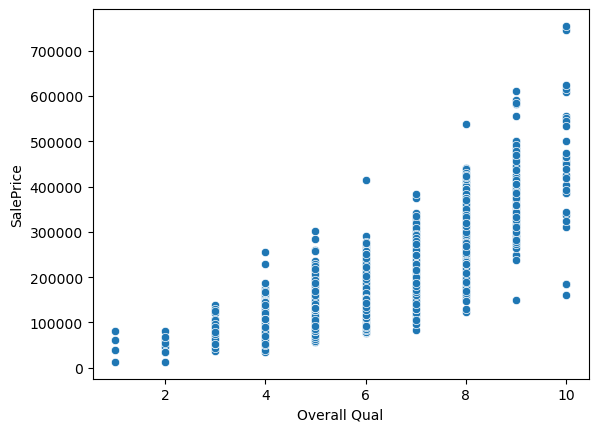

In [28]:
sns.scatterplot(x = 'Overall Qual', y = 'SalePrice', data = df)

<Axes: xlabel='Gr Liv Area', ylabel='SalePrice'>

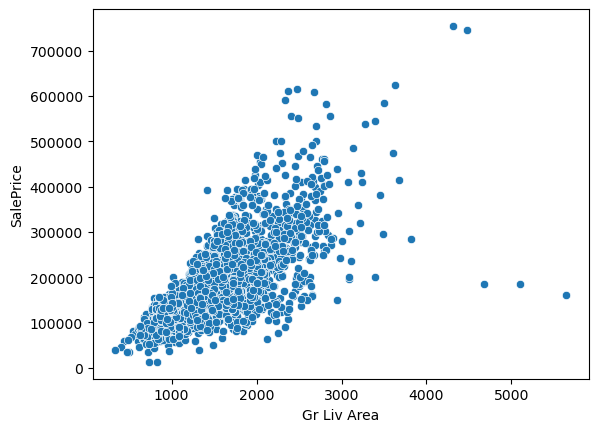

In [29]:
sns.scatterplot(x = 'Gr Liv Area', y = 'SalePrice', data = df)

In [30]:
df[(df['Gr Liv Area']>4000) & (df['SalePrice']<300000)].index

Int64Index([1498, 2180, 2181], dtype='int64')

In [31]:
df = df.drop([1498, 2180, 2181], axis = 0)

<Axes: xlabel='Gr Liv Area', ylabel='SalePrice'>

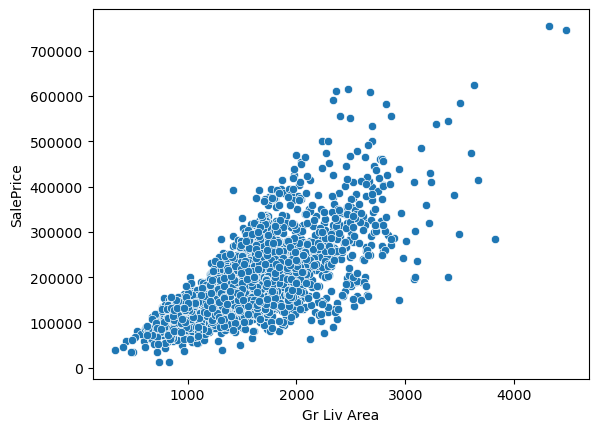

In [32]:
sns.scatterplot(x = 'Gr Liv Area', y = 'SalePrice', data = df)

<Axes: xlabel='Overall Qual', ylabel='SalePrice'>

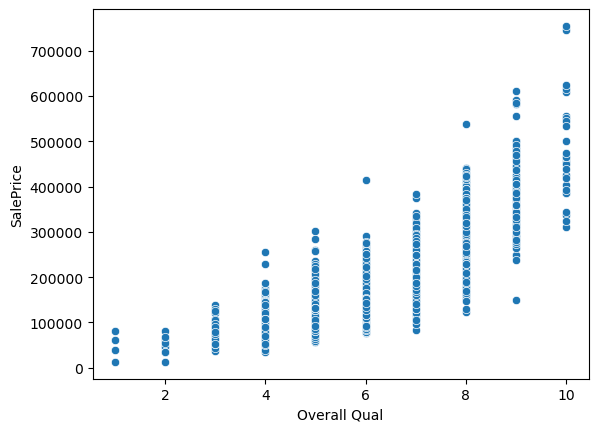

In [33]:
sns.scatterplot(x = 'Overall Qual', y = 'SalePrice', data = df)

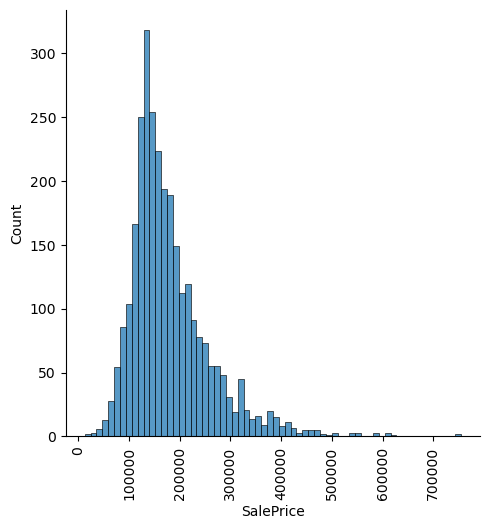

In [34]:
sns.displot(x = 'SalePrice', data = df)
plt.xticks(rotation = 90);

<Axes: >

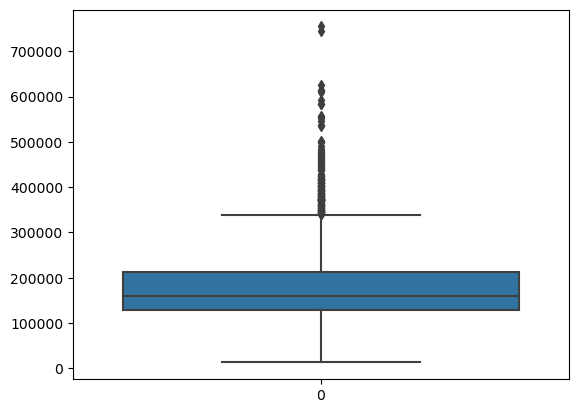

In [35]:
sns.boxplot(df['SalePrice'])

In [36]:
from sklearn.preprocessing import StandardScaler

In [37]:
scaler = StandardScaler()

In [38]:
df[(df['Overall Qual'] == 9) & (df['SalePrice'] < 200000)]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1182,60,RL,NaN,24572,Pave,NaN,IR1,Lvl,AllPub,CulDSac,...,0,NaN,NaN,NaN,0,6,2008,WD,Family,150000


In [39]:
df = df.drop(1182)

In [40]:
df[(df['Overall Qual'] == 9) & (df['SalePrice'] < 200000)]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice


<Axes: xlabel='Overall Qual', ylabel='SalePrice'>

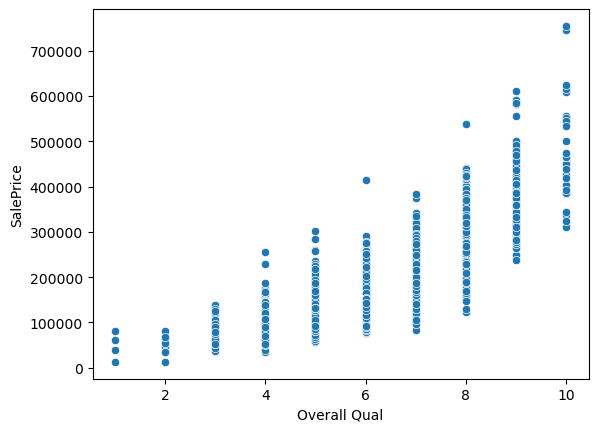

In [41]:
sns.scatterplot(x = 'Overall Qual', y = 'SalePrice', data = df)

<Axes: xlabel='Gr Liv Area', ylabel='SalePrice'>

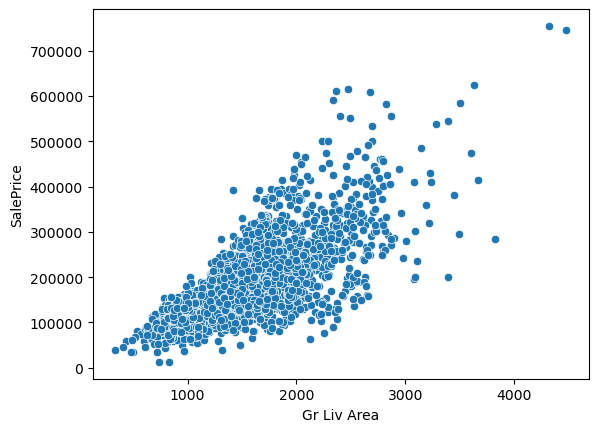

In [42]:
sns.scatterplot(x = 'Gr Liv Area', y = 'SalePrice', data = df)

In [43]:
df.shape

(2924, 80)

In [44]:
percent_missing(df)

BsmtFin SF 1       0.034200
BsmtFin SF 2       0.034200
Bsmt Unf SF        0.034200
Total Bsmt SF      0.034200
Bsmt Half Bath     0.068399
Bsmt Full Bath     0.068399
Mas Vnr Type       0.786594
Mas Vnr Area       0.786594
Garage Type        5.369357
Garage Cond        5.403557
Garage Qual        5.403557
Garage Finish      5.403557
Garage Yr Blt      5.403557
Lot Frontage      16.723666
Fireplace Qu      48.563611
Fence             80.471956
Alley             93.228454
Misc Feature      96.409029
Pool QC           99.589603
dtype: float64

In [45]:
df = df.dropna(subset=['Bsmt Half Bath'], axis = 0)

In [46]:
percent_missing(df)

Mas Vnr Type      0.787132
Mas Vnr Area      0.787132
Garage Type       5.373032
Garage Yr Blt     5.407255
Garage Finish     5.407255
Garage Qual       5.407255
Garage Cond       5.407255
Lot Frontage     16.735113
Fireplace Qu     48.562628
Fence            80.492813
Alley            93.223819
Misc Feature     96.406571
Pool QC          99.589322
dtype: float64

In [47]:
df = df.drop(['Fence', 'Alley','Misc Feature','Pool QC'], axis = 1)

In [48]:
percent_missing(df)

Mas Vnr Type      0.787132
Mas Vnr Area      0.787132
Garage Type       5.373032
Garage Yr Blt     5.407255
Garage Finish     5.407255
Garage Qual       5.407255
Garage Cond       5.407255
Lot Frontage     16.735113
Fireplace Qu     48.562628
dtype: float64

In [49]:
df['Mas Vnr Type'] = df['Mas Vnr Type'].fillna('None')

In [50]:
df['Mas Vnr Area'] = df['Mas Vnr Area'].fillna(0)

In [51]:
percent_missing(df)

Garage Type       5.373032
Garage Yr Blt     5.407255
Garage Finish     5.407255
Garage Qual       5.407255
Garage Cond       5.407255
Lot Frontage     16.735113
Fireplace Qu     48.562628
dtype: float64

In [52]:
df[['Garage Type','Garage Finish','Garage Qual','Garage Cond']] = df[['Garage Type','Garage Finish','Garage Qual','Garage Cond']].fillna('None')

In [53]:
percent_missing(df)

Garage Yr Blt     5.407255
Lot Frontage     16.735113
Fireplace Qu     48.562628
dtype: float64

In [54]:
df['Garage Yr Blt'] = df['Garage Yr Blt'].fillna(0)

In [55]:
percent_missing(df)

Lot Frontage    16.735113
Fireplace Qu    48.562628
dtype: float64

In [56]:
df['Fireplace Qu'].value_counts()

Gd    739
TA    600
Fa     75
Po     46
Ex     43
Name: Fireplace Qu, dtype: int64

In [57]:
df['Fireplace Qu'] = df['Fireplace Qu'].fillna('None')

In [58]:
percent_missing(df)

Lot Frontage    16.735113
dtype: float64

In [59]:
df.columns

Index(['MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area', 'Street',
       'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config', 'Land Slope',
       'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
       'House Style', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remod/Add', 'Roof Style', 'Roof Matl', 'Exterior 1st',
       'Exterior 2nd', 'Mas Vnr Type', 'Mas Vnr Area', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', 'Heating', 'Heating QC', 'Central Air',
       'Electrical', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual',
       'TotRms AbvGrd', 'Functional', 'Fireplaces', 'Fireplace Qu',
       'Garage Type', 'Garage Yr Blt', 'Garage Finish', 'Garage Cars',

In [60]:
df.groupby('Neighborhood')['Lot Frontage'].mean()

Neighborhood
Blmngtn    46.900000
Blueste    27.300000
BrDale     21.500000
BrkSide    55.329787
ClearCr    88.150000
CollgCr    71.336364
Crawfor    69.951807
Edwards    64.459770
Gilbert    74.207207
Greens     41.000000
GrnHill          NaN
IDOTRR     62.383721
Landmrk          NaN
MeadowV    25.606061
Mitchel    75.144444
NAmes      75.210667
NPkVill    28.142857
NWAmes     81.517647
NoRidge    91.629630
NridgHt    84.184049
OldTown    61.777293
SWISU      59.068182
Sawyer     74.551020
SawyerW    70.669811
Somerst    64.549383
StoneBr    62.173913
Timber     81.303571
Veenker    72.000000
Name: Lot Frontage, dtype: float64

In [61]:
df['Lot Frontage'] = df.groupby('Neighborhood')['Lot Frontage'].transform(lambda value:value.fillna(value.mean()))

In [62]:
percent_missing(df)

Lot Frontage    0.102669
dtype: float64

In [63]:
df.isnull().sum()

MS SubClass       0
MS Zoning         0
Lot Frontage      3
Lot Area          0
Street            0
                 ..
Mo Sold           0
Yr Sold           0
Sale Type         0
Sale Condition    0
SalePrice         0
Length: 76, dtype: int64

In [64]:
df['Lot Frontage'] = df['Lot Frontage'].fillna(0)

In [65]:
df.isnull().sum()

MS SubClass       0
MS Zoning         0
Lot Frontage      0
Lot Area          0
Street            0
                 ..
Mo Sold           0
Yr Sold           0
Sale Type         0
Sale Condition    0
SalePrice         0
Length: 76, dtype: int64

In [66]:
percent_missing(df)

Series([], dtype: float64)

In [67]:
df['MS SubClass'] = df['MS SubClass'].apply(str)

In [68]:
df = pd.get_dummies(df, drop_first=True)

In [69]:
df.shape

(2922, 274)

In [70]:
df.corr()['SalePrice'].sort_values()

Exter Qual_TA       -0.592271
Kitchen Qual_TA     -0.527302
Fireplace Qu_None   -0.481515
Bsmt Qual_TA        -0.453581
Garage Finish_Unf   -0.422987
                       ...   
Garage Cars          0.648926
Total Bsmt SF        0.662775
Gr Liv Area          0.729528
Overall Qual         0.804058
SalePrice            1.000000
Name: SalePrice, Length: 274, dtype: float64

In [71]:
df.to_csv('final_ames_data')

In [72]:
from sklearn.preprocessing import MinMaxScaler

In [73]:
scale = MinMaxScaler()

In [74]:
X = df.drop('SalePrice', axis = 1)

In [75]:
y = df['SalePrice']

In [76]:
from sklearn.model_selection import train_test_split

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=101)

In [78]:
X_train  = scale.fit_transform(X_train)

In [79]:
X_test = scale.transform(X_test)

In [80]:
from sklearn.linear_model import LinearRegression

In [81]:
lr_model = LinearRegression()

In [82]:
lr_model.fit(X_train, y_train)

LinearRegression()

In [83]:
y_pred = lr_model.predict(X_test)

In [84]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [85]:
mean_absolute_error(y_test, y_pred)

17296803882457.25

In [86]:
np.sqrt(mean_squared_error(y_test, y_pred))

277068086361388.1

In [87]:
r2_score(y_test, y_pred)

-1.162522051877313e+19

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=101)

In [89]:
X_train.shape

(2045, 273)

In [90]:
X_test.shape

(877, 273)

In [91]:
lr_model = LinearRegression()

In [92]:
lr_model.fit(X_train, y_train)

LinearRegression()

In [93]:
y_pred = lr_model.predict(X_test)

In [94]:
mean_absolute_error(y_test, y_pred)

15089.894935411558

In [95]:
np.sqrt(mean_squared_error(y_test, y_pred))

22196.434407945075

In [96]:
df['SalePrice'].describe()

count      2922.000000
mean     180825.375428
std       79945.420181
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [97]:
r2_score(y_test, y_pred)

0.9253904155502448

In [98]:
from sklearn.linear_model import ElasticNet

In [99]:
elatic_model = ElasticNet()

In [100]:
param_grid = {'alpha':[1.0,10,50,100],'l1_ratio':[0.1,0.3,0.5,0.7,0.9,1],'max_iter':[100000]}

In [101]:
from sklearn.model_selection import GridSearchCV

In [102]:
grid_model = GridSearchCV(elatic_model, param_grid=param_grid,cv = 5, scoring='neg_mean_squared_error')

In [104]:
grid_model.fit(X_train, y_train)

C:\Users\myakubpasha\AppData\Local\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.706e+11, tolerance: 1.017e+09
  model = cd_fast.enet_coordinate_descent(
C:\Users\myakubpasha\AppData\Local\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.232e+11, tolerance: 1.059e+09
  model = cd_fast.enet_coordinate_descent(
C:\Users\myakubpasha\AppData\Local\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider

C:\Users\myakubpasha\AppData\Local\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.733e+11, tolerance: 1.067e+09
  model = cd_fast.enet_coordinate_descent(
C:\Users\myakubpasha\AppData\Local\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.761e+11, tolerance: 1.026e+09
  model = cd_fast.enet_coordinate_descent(
C:\Users\myakubpasha\AppData\Local\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [1.0, 10, 50, 100],
                         'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9, 1],
                         'max_iter': [100000]},
             scoring='neg_mean_squared_error')

In [105]:
grid_model.best_estimator_

ElasticNet(alpha=50, l1_ratio=1, max_iter=100000)

In [106]:
grid_model.best_params_

{'alpha': 50, 'l1_ratio': 1, 'max_iter': 100000}

In [107]:
y_pred = grid_model.predict(X_test)

In [108]:
mean_absolute_error(y_test, y_pred)

14574.066389113754

In [109]:
np.sqrt(mean_squared_error(y_test, y_pred))

21427.561654117486

In [110]:
elast_model = ElasticNet(alpha=50, l1_ratio=1, max_iter=1000000)

In [111]:
elast_model.fit(X_train, y_train)

ElasticNet(alpha=50, l1_ratio=1, max_iter=1000000)

In [112]:
y_preds = elast_model.predict(X_test)

In [113]:
mean_absolute_error(y_test, y_preds)

14574.066389113754